In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

<h1>Overfit, underfit</h1>

In [86]:
x = np.sort(np.random.choice(range(1, 6), size=4, replace=False))
y = np.random.choice(range(1, 8), size=4, replace=False)

In [87]:
deg2 = np.polyfit(x, y, 2)
pol2 = np.poly1d(deg2)

deg3 = np.polyfit(x, y, 3)
pol3 = np.poly1d(deg3)

deg20 = np.polyfit(x, y, 20)
pol20 = np.poly1d(deg20)

C:\Users\tomas\anaconda3\envs\asl\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [113]:
xs = np.linspace(0, 6)
ys2 = pol2(xs)
ys3 = pol3(xs)
ys20 = pol20(xs)

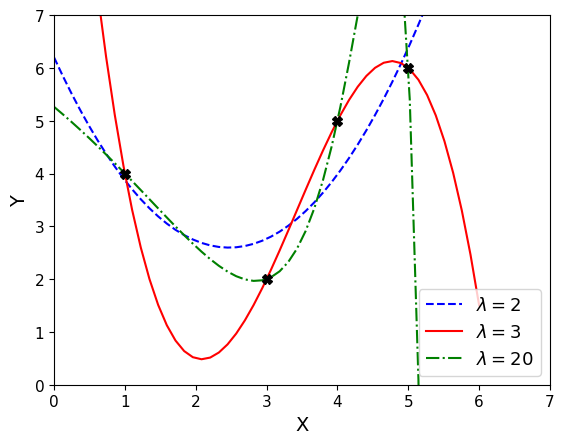

In [114]:
plt.plot(xs, ys2, "--", color="blue")
plt.plot(xs, ys3, "-", color="red")
plt.plot(xs, ys20, "-.", color="green")
plt.plot(x, y, "X", color="k", markersize=7)

plt.xlim([0, x[-1] + 2])
plt.ylim([0, np.max(y) + 1])
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.legend([r"$\lambda = 2$",
            r"$\lambda = 3$",
            r"$\lambda = 20$"], fontsize=13)

plt.savefig("../Images/overfitting.PNG", format="PNG", facecolor="auto", transparent=False)

plt.show()

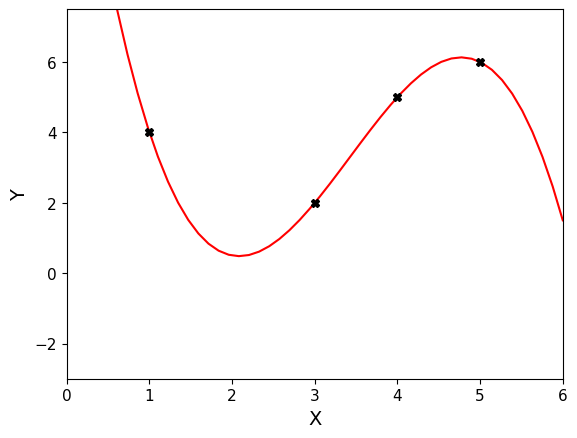

In [90]:
plt.plot(xs, ys3, color="red")
plt.plot(x, y, "X", color="k", markersize=6)

plt.xlim([0, x[-1] + 1])
plt.ylim([-3, np.max(y) + 1.5])
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)

plt.savefig("../Images/cubic.PNG", format="PNG", facecolor="auto", transparent=False)

plt.show()

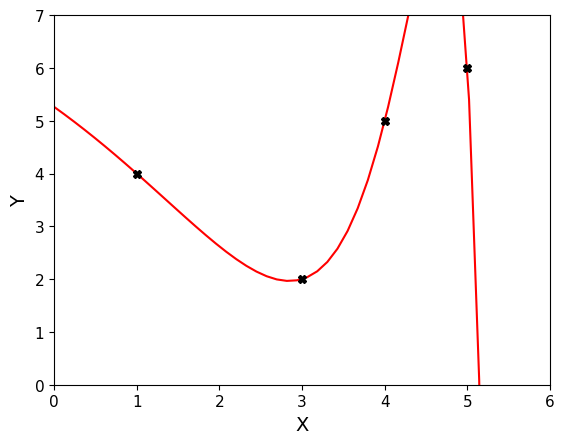

In [91]:
plt.plot(xs, ys20, color="red")
plt.plot(x, y, "X", color="k", markersize=6)

plt.xlim([0, x[-1] + 1])
plt.ylim([0, np.max(y) + 1])
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)

plt.savefig("../Images/overfit.PNG", format="PNG", facecolor="auto", transparent=False)

plt.show()

<h1>ReLU Function</h1>

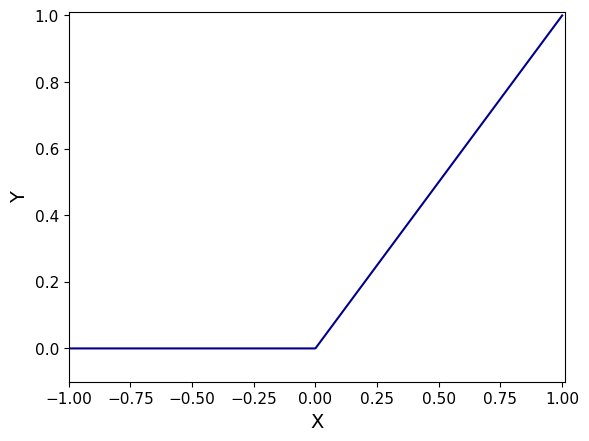

In [17]:
xs = np.linspace(-1, 1, 1000)
plt.plot(xs, [0 if x <= 0 else x for x in xs], color="darkblue")

plt.xlim([-1, 1.01])
plt.ylim([-0.1, 1.01])
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)

plt.savefig("../Images/relu.PNG", format="PNG", facecolor="auto", transparent=False)

plt.show()